# Imports


In [1]:
from utils.transforms import *
from utils.dataset import *
from utils.experiment import Experiment


# Baseline

- Basic normalization
  - normalize values between 0 and 1 because images from the different datasets have different value ranges in the images
  - equalizeHist to have a unified brightness and contrast
  - normalize mean because it normalizes statistical properties of the images and is a recommended and often used step
  - same for standardization
- warum diese reihenfolge?


In [2]:
normalization = [
    Resize((32, 64)),
    Standardize(),
    NormalizeValues(),
    EqualizeHist(),
    Resize((64, 128)),
    ToTensor(),
]

baseline = Experiment("Baseline", normalization)


Running Experiment >>Baseline<<
Reading data took 1.3s


Train progress: [                               ] 0/737 Epoch: --- Loss: ------
Train progress: [                             ] 9/737 Epoch: 1/1 Loss: ↘ 1.0960
Train progress: [                            ] 19/737 Epoch: 1/1 Loss: ↘ 1.0679
Train progress: [-                           ] 29/737 Epoch: 1/1 Loss: ↘ 1.0182
Train progress: [-                           ] 39/737 Epoch: 1/1 Loss: ↗ 1.0633
Train progress: [-                           ] 49/737 Epoch: 1/1 Loss: ↘ 1.0134
Train progress: [--                          ] 59/737 Epoch: 1/1 Loss: ↗ 1.0297
Train progress: [--                          ] 69/737 Epoch: 1/1 Loss: ↘ 1.0091
Train progress: [---                         ] 79/737 Epoch: 1/1 Loss: ↗ 1.0448
Train progress: [---                         ] 89/737 Epoch: 1/1 Loss: ↗ 1.0664
Train progress: [---                         ] 99/737 Epoch: 1/1 Loss: ↘ 1.0158
Train progress: [---                        ] 109/737 Epoch: 1/1 Loss: ↘ 0.8945
Train progress: [----                   

Training took 2m 7.2s
Evaluating took 19.9s
Normalized confusion matrix
Successfully ran Experiment >>Baseline<<


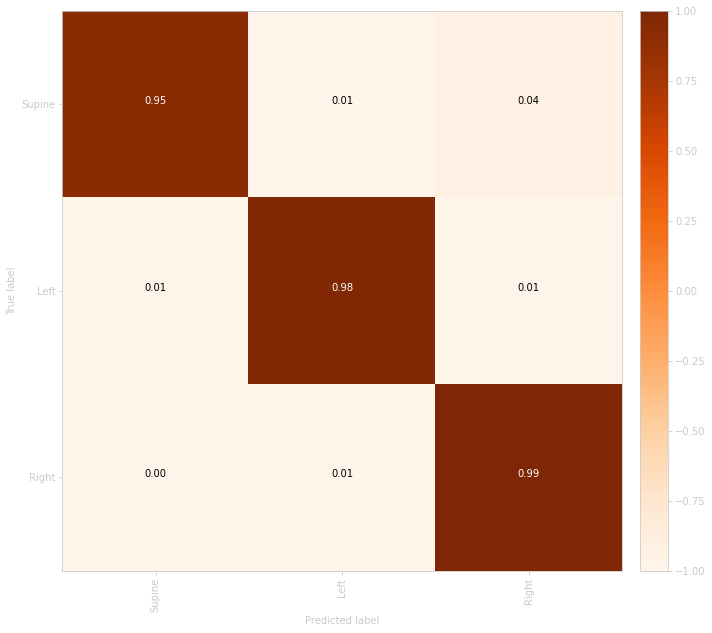

In [3]:
baseline.run()

# Agressive Thresholding


In [4]:
agressive_thresholding = Experiment(
    "Agressive Thresholding",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
    ],
)


# Agressive Thresholding + Sobel


In [5]:
sobel = Experiment(
    "Agressive Thresholding + Sobel",
    [
        *normalization,
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Sobel(),
        Threshold(lambda img: np.median(img[img > 0.0])),
    ],
)


# Rolling Ball + Agressive Thresholding


In [6]:
rolling_ball = Experiment("Rolling Ball + Agressive Thresholding",
    [
        *normalization,
        RollingBall(radius=5),
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
    ]
)


# Fourier


In [7]:
fourier = Experiment("Fourier",
    [
        *normalization,
        Denoise(),
        Blur((3, 3)),
        HighPass(rad=50),
        Blur((3, 3)),
        Threshold(lambda img: np.median(img[img > 0.0])),
    ]
)


# Improving SLP

- hier zwei szenarien testen: einmal diese transformation auf beide datensätze anwenden und einmal nur auf slp und agressive thresholding oder so auf physionet
- interessante sache: später resizen behält in den schritten davor noch mehr details, womit besser preprocessed werden kann
- Potential: Menschen auf slp bildern vergrößern, damit die auf allen druckbildern ungefähr gleich groß sind


In [8]:
improve_slp = Experiment("Improve SLP",
    [
        Standardize(),
        NormalizeValues(),
        EqualizeHist(),
        Blur((3, 3)),
        Denoise(),
        Threshold(lambda img: np.median(img[img > 0.0])),
        Close((3, 3), ktype=cv2.MORPH_CROSS, iterations=3),
        Blur((3, 3)),
        Resize((32, 64)),
    ]
)


# Evaluation

In [9]:
experiments = [baseline]#, agressive_thresholding, sobel, rolling_ball, fourier, improve_slp]

for experiment in experiments:
    experiment.run()

Running Experiment >>Baseline<<
Successfully ran Experiment >>Baseline<<
Running Experiment >>Agressive Thresholding<<
Successfully ran Experiment >>Agressive Thresholding<<
Running Experiment >>Agressive Thresholding + Sobel<<
Successfully ran Experiment >>Agressive Thresholding + Sobel<<
Running Experiment >>Rolling Ball + Agressive Thresholding<<
Successfully ran Experiment >>Rolling Ball + Agressive Thresholding<<
Running Experiment >>Fourier<<
Successfully ran Experiment >>Fourier<<


AttributeError: 'tuple' object has no attribute 'run'